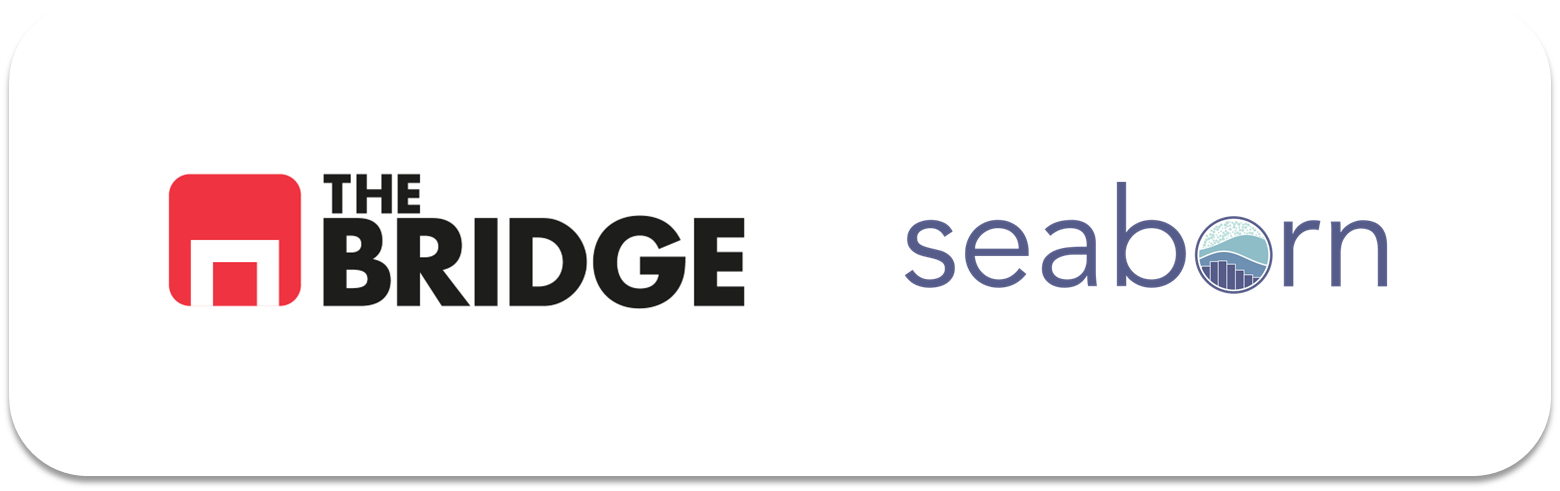

# Visualización Aplicada: Mostrando una Variable Categórica

Nos centramos ahora en visualizar una única variable (tanto para análisis como presentación). Dividimos en dos grupos categóricas y númericas. En esta sesión trataremos las categóricas.

Lo primero, importamos librerías y cargamos datos:

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set(color_codes=True)

In [3]:
df_titanic = pd.read_csv("./data/titanic.csv")
df_seguros = pd.read_csv("./data/Marketing-Customer-Analysis.csv")

### Gráficas y consideraciones

Veremos las siguientes:
- Diagrama de barras para frecuencias(para frecuencias absolutas y relativas)
- Diagrama de esferas/círculos para frecuencias( absolutas y relativas)
- Quesos, donuts y otras cosas de comer: lolipops( para la primera parte en F relativas y la 2 parte con f_absolutas )


#### Consideraciones generales: 

* **Cuándo**: Análisis univariante de caracter categorico de frecuencias y presentación de distribución de valores cuando esto aporte algo (en general para introducciones y dar contexto con diagramas de barras). Los diagramas de tarta y queso funcionan mejor con frecuencias relativas que con absolutas. Los lolipops no son de mi gusto, pero para que tengas otros.

* **Cuándo no**: Incluso en la situación de que sea necesario por dar contexto hablar de los valores de una variable categórica, si la cardinalidad es mayor de 5 (más o menos) reducirla mostrando 4-5 valores como mucho colapsando los no interesantes en un grupo "otros" (ojo, los no interesantes no son los de menor frecuencia son los que no aporten nada a los mensajes a transmitir )

### Barras

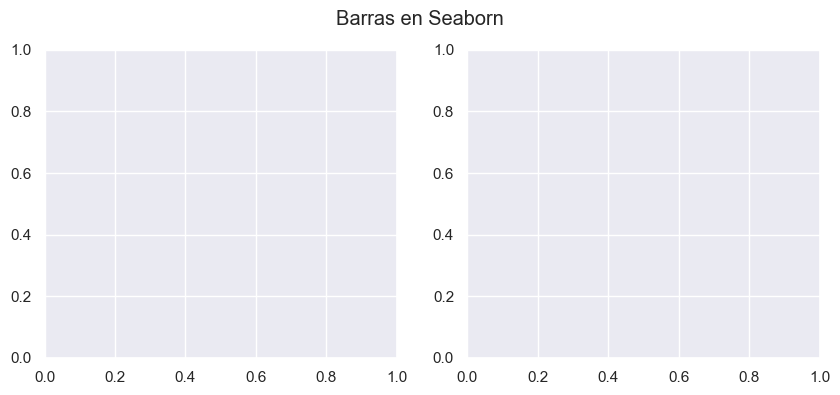

In [4]:
### Creamos figura y axes
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,4))# creamos la figura que gusrada los arrays en axs
fig.suptitle("Barras en Seaborn");# suptitle le da titulo a toda la figura 



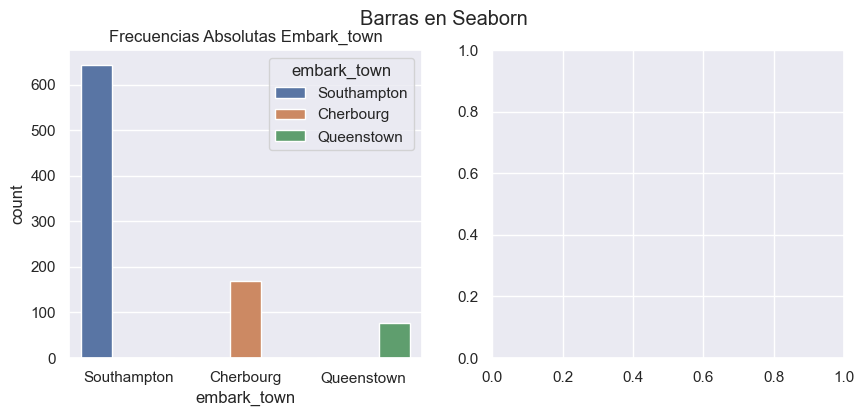

In [5]:
### Countplot, nos permite frecuencias(CON F.ABSOLUTAS LA HRAFICA NOS HACE DIRECTAMENTE LE CONTEO)

sns.countplot(x = "embark_town", data = df_titanic, ax=axs[0], hue ="embark_town")# countplot es el que nos hace frecuencias absolutas con seaborn(con hue es con el que se controla 
# el color de los datos), si no lo pusieramos nos pusieran todas las barras del mimso color
axs[0].set_title("Frecuencias Absolutas Embark_town")
#plt.title ("Frecuencias Absolutas Embark_town")# con esta tb sale pero crea una figura abajo vacia con el titulo dado


fig



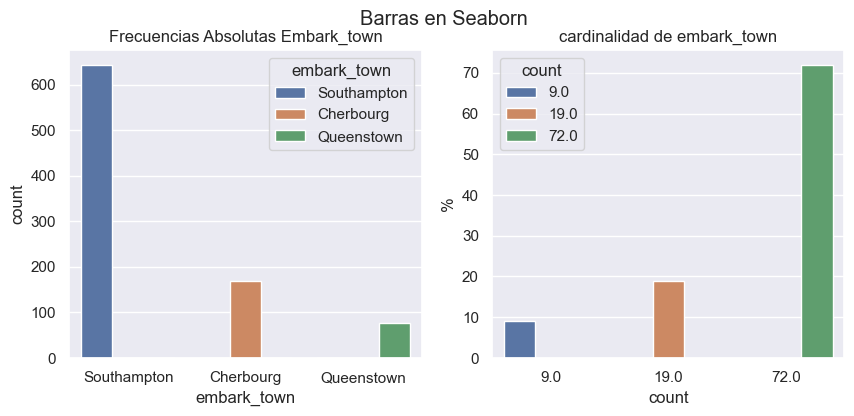

In [6]:
valores = round(df_titanic.embark_town.value_counts()/len(df_titanic) * 100)# CALCULAMOS LA CARDINALIDADAD
sns.barplot(x = valores, y = valores, hue = valores, ax = axs[1])# aqui usamos el grafico de barras normal(x es el indice de los valores y values es la F,relativa,
# con hue que use un color para cada uno, los indices de valares y lo colocamos en la figura principal)
axs[1].set_title("cardinalidad de embark_town")
axs[1].set_ylabel("%")
fig

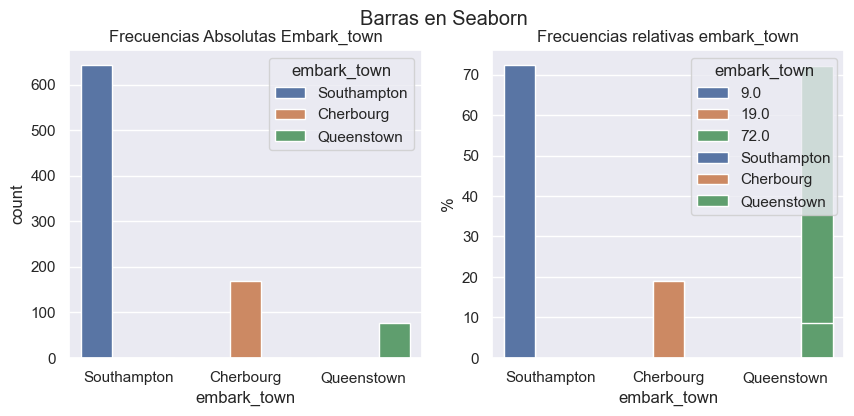

In [7]:
# Para frecuencias relativas... también hay que calcularlas previamente y puedes usar el barplot (si parecido a matplotlib)(CON F RELATIVAS  EL CONTEO LO TENEMOS Q CALCULAR)
valores = df_titanic.embark_town.value_counts(normalize = True) * 100# CALCULAMOS LA FRECUENCIA RELATIVA
sns.barplot(x = valores.index, y = valores.values, hue = valores.index, ax = axs[1])# aqui usamos el grafico de barras normal(x es el indice de los valores y values es la F,relativa,
# con hue que use un color para cada uno, los indices de valares y lo colocamos en la figura)
axs[1].set_title("Frecuencias relativas embark_town")
axs[1].set_ylabel("%")
fig

### Circulos

Text(0.5, 0.98, 'Círculos de Seaborn')

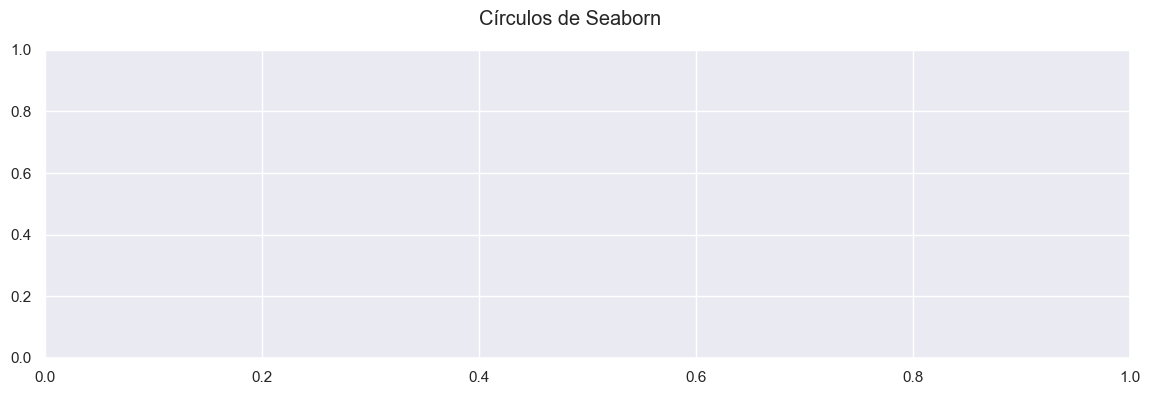

In [8]:
### Creamos figura y axe(AQUI PINTAREMOS 5 CIRCULOS QUE CORRESPONEDN A CADA UNO DELOS 5 ESTADOS DE NUESTRO DF_SEGUROS)
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(14,4))
fig.suptitle("Círculos de Seaborn")


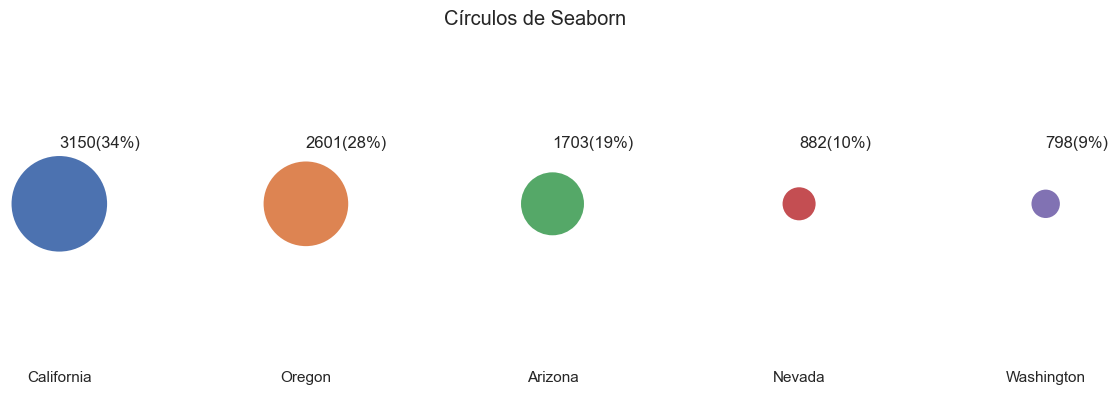

In [9]:
### Frecuencias absolutas y relativas( grafica segun numero de clientes segun estado)
axs.cla()# estolimpia los valores si cambias algun valor despues de ejecutase la grafica m pq sino los va acumulando

frecuencias = df_seguros["state"].value_counts()# CONTEO= FRECUENCIA ABSOLUTA
df_frecuencias = df_seguros["state"].value_counts().reset_index()# despues hago un DF con el truco del reset index, teniendo en la 1 columna con las categorias(valores estados) y en la 
#otra columna el resultado del vaule_counts y eso le llamo frecuncias, cambiando el nombre de las columnas del DF(siguinete linea)
df_frecuencias.columns = ["categorias","frecuencias"]
sns.scatterplot(x = "categorias", y = [1]*len(frecuencias), hue = "categorias", data = df_frecuencias, size = "frecuencias", legend = False, ax = axs, sizes = (500,5000))
axs.set_xlabel("")# en x los estados en y la posicion relativa en el diagrama , hue = distintos colores, data= DF creado, size=el tamaño de las bolas dependa a la columna frecuencias,
# que quite la lengenda, y que lo pinte en axs, y el tamaño de las bolas va desde 500 a 5000
for estado,valor in frecuencias.items():
    axs.text(estado,1.02,f"{valor}({round(valor*100/frecuencias.sum())}%)")
axs.set_facecolor("none")# quita la cuadricula fondo gris
axs.yaxis.set_ticks([])# quita los ticks( los valores por defecto numeros que salen en x e y ( yticks y xticks))
fig

### Donuts, tartas, quesos

Seaborn no viene con ellos, así que usamos matplotlib, empezamos con la tarta/queso:

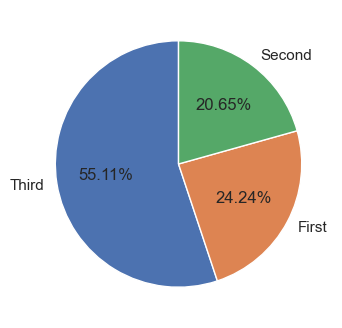

In [10]:
data = df_titanic["class"].value_counts() #conteo F. Absolutas

fig,ax = plt.subplots(1,1,figsize = (4,4))# 1 fila y 1 columna

ax.pie(data.values,# datos de la f.absoulta y el solo realziara el calculo de las relativas
        labels=data.index,# etiquetas el nombre de las clases 
        autopct='%.2f%%', startangle= 90);# en seaborn no hay pie, que es lo qye dibuja el grafico de tarta
#autopct= texto del quesito( usa un decimal con 2 nuemro decimelaes detras del punto) y starangle es el giro del quesito en grados

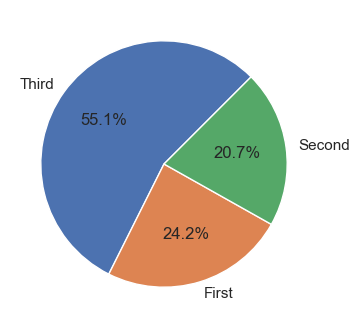

In [11]:
data = df_titanic["class"].value_counts() #conteo F. Absolutas

fig,ax = plt.subplots(1,1,figsize = (4,4))# 1 fila y 1 columna

ax.pie(data.values,# datos de la f.absoulta y el solo realziara el calculo de las relativas
        labels=data.index,# etiquetas el nombre de las clases 
        autopct='%.1f%%', startangle= 45);# en seaborn no hay pie, que es lo qye dibuja el grafico de tarta
#autopct= texto del quesito( usa un decimal con 2 nuemro decimelaes detras del punto) y starangle es el giro del quesito en grados

Ahora tipo donut:

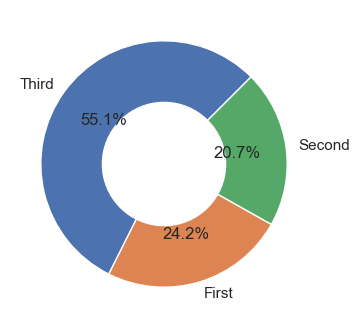

In [12]:
# tengo que crearme un circulo que agrego el centro del diagrama de tarta anterior y eso añadiendolo ax de l tarta

my_circle = plt.Circle((0,0), 0.5, color="white")# centrado en 0,0 , con un tamaño 0.5 y de color blanco
ax.add_artist(my_circle)# con este metodo añado dibujos a mi grafica

fig

### Lolipops

Este tampoco lo tenemos en seaborn:

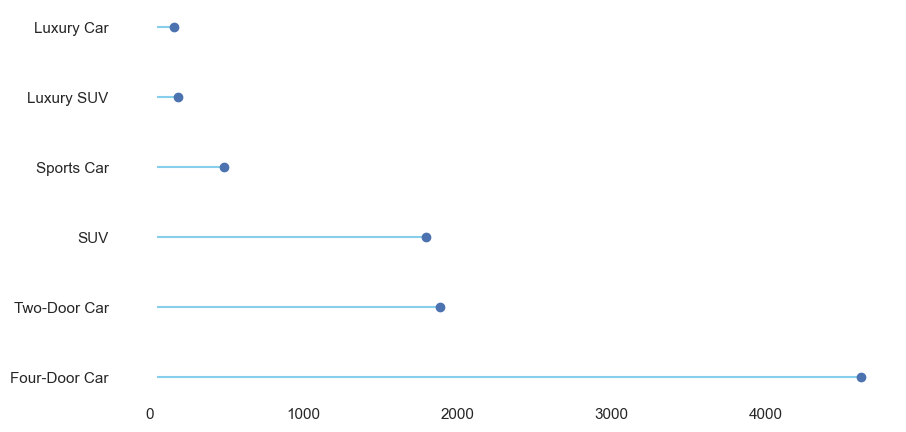

In [13]:
#un diagrama de lineas horizaontales que terminan en un punto y nos muestras las fracuencias
conteo = df_seguros['vehicle_class'].value_counts(ascending=False)# frecuencia abosluta

plt.figure(figsize=(10,5))
plt.hlines(y=conteo.index,
           xmin= 50,#valor minimo
           xmax=conteo,
           color='skyblue')
p=plt.gcf()
p.gca().set_facecolor("none")# borra enl fndo gris de cuadrculas
plt.plot(conteo, conteo.index, "o");
